In [36]:
import pyhf
import numpy
import matplotlib
from matplotlib import pyplot

pyhf.set_backend("numpy")

In [37]:
model = pyhf.simplemodels.uncorrelated_background(
    signal=[10.0], bkg=[50.0], bkg_uncertainty=[7.0]
)

actualdata = numpy.array([55])
data = numpy.concatenate([actualdata, model.config.auxdata])

In [38]:
print(data)

[55.         51.02040816]


In [39]:
model.config.suggested_init()

[1.0, 1.0]

In [40]:
model.config.suggested_bounds()

[(0, 10), (1e-10, 10.0)]

In [41]:
model.config.suggested_fixed()

[False, False]

In [42]:
model.spec

{'channels': [{'name': 'singlechannel',
   'samples': [{'name': 'signal',
     'data': [10.0],
     'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None}]},
    {'name': 'background',
     'data': [50.0],
     'modifiers': [{'name': 'uncorr_bkguncrt',
       'type': 'shapesys',
       'data': [7.0]}]}]}]}

In [43]:
model.config.par_map

{'mu': {'slice': slice(0, 1, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fc2103a3880>},
 'uncorr_bkguncrt': {'slice': slice(1, 2, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_poisson at 0x7fc2103a3370>}}

# Data are extended by model.config.auxdata
# Parameters are not

In [44]:
model.expected_actualdata(model.config.suggested_init())

array([60.])

In [45]:
model.expected_actualdata([0.0, 0.9])

array([45.])

In [46]:
model.logpdf([0.0, 0.9], data)

array([-7.12118891])

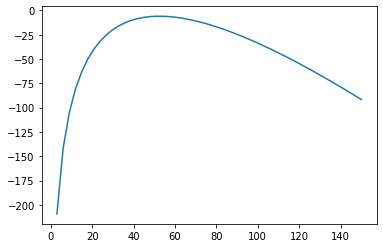

In [47]:
def plot_mu_logp():
    grid = numpy.linspace(-3, 3, 101)
    
    mu = []
    logp = []
    for x in grid:
        mu.append(model.expected_actualdata([0.0, x]))
        logp.append(model.logpdf([0.0, x], data))
    
    pyplot.plot(mu, logp)
    pyplot.show()
    
plot_mu_logp()

# how to exclude poisson terms?
_MainModel 
````python
    def make_pdf(self, pars):
        lambdas_data = self.expected_data(pars)
        return prob.Independent(prob.Poisson(lambdas_data))
````

# simplest to just subtract them

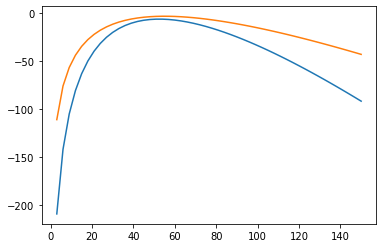

/tmp/ipykernel_6228/1455046509.py:23: RuntimeWarning: invalid value encountered in subtract
  pyplot.plot(mu, numpy.array(logp) - loglike)


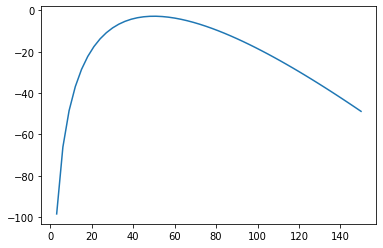

In [51]:
def plot_mu_logp_nolikelihood():
    grid = numpy.linspace(-3, 3, 101)#
    
    ndata = data[0]
    
    mu = []
    logp = []
    loglike = []
    for x in grid:
        mux = model.expected_actualdata([0.0, x])
        logpx = model.logpdf([0.0, x], data)
        
        loglikex = pyhf.probability.Poisson(mux).log_prob(actualdata)
        
        mu.append(mux)
        logp.append(logpx)
        loglike.append(loglikex)
    
    pyplot.plot(mu, logp)
    pyplot.plot(mu, loglike)
    pyplot.show()
    
    pyplot.plot(mu, numpy.array(logp) - loglike)
    pyplot.show()

plot_mu_logp_nolikelihood()